# Работа №2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.


**План занятия**

* [Теоретическая часть](#theory)
    * [Масштабирование признаков](#0)
    * [Стохастический градиентный спуск](#1)
    * [SGD своими руками](#sgd_manual)
    * [Переобучение](#overfit)
    * [Методы борьбы с переобучением](#methods)
        * [Регуляризация](#reg)
* [Практическая часть](#practice)
    * [Домашнее задание](#hw)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

## Масштабирование признаков <a class='anchor' id='0'>

В машинном обучении при работе с линейными моделями полезной является практика _масштабирования признаков_. Многие методы машинного обучения, в том числе и линейные, наиболее эффективны в том случае, когда признаки имеют одинаковый масштаб. По сути масштабирование означает приведение признаков к какой-то единой шкале. 

Существует большое количество методов масштабирования, наиболее популярными из которых являются _нормализация_ и _стандартизация_.

Метод **нормализации** заключается в приведении признаков к масштабу в диапазоне [0-1].

Для его реализации необходимо найти минимальное $min_{j} (x^{j}_{i})$ и максимальное $max_{j} (x^{j}_{i})$ значение признака на обучающей выборке. При этом отмасштабированное значение признака будет находиться по формуле

$$x^{j}_{i} = \frac{x^{j}_{i} - min_{j} (x^{j}_{i})}{max_{j} (x^{j}_{i})-min_{j} (x^{j}_{i})}.$$

После преобразования значений признаков минимальное значение превратится в 0, а максимальное - в 1.

Пример различия в сходимости алгоритма на сырых и нормализованных данных:
<img src="L2_normalization.png" style="width: 500px;">

**Стандартизация** заключается в получении своего рода значения сдвига каждого признака от среднего. Для ее реализации необходимо вычислить среднее значение признака 

$$\mu_{j} = \frac{1}{l}\sum^{l}_{i=1}x^{j}_{i}$$

и стандартное отклонение, которое находится путем суммирования квадратов отклонения значений признака на объектах выборки от среднего $\mu_{j}$ и делением на число объектов выборки с последующим извлечением корня:

$$\sigma_{j} = \sqrt{\frac{1}{l}\sum^{l}_{i=1}(x^{j}_{i}-\mu_{j})^{2}}$$

Чтобы отмасштабировать признак, каждое его значение преобразуется по формуле

$$x^{j}_{i}=\frac{x^{j}_{i} - \mu_{j}}{\sigma_{j}}.$$

In [ ]:
https://scikit-learn.ru/6-3-preprocessing-data/

Масштабирование является важным этапом подготовки данных перед применением методов машинного обучения. 

Важным и последним свойством масштабирования является факт, что после масштабирования признаков в линейных моделях веса при них могут интерпретироваться как мера значимости этих признаков.

Существуют различные ситуации, когда целесообразно применять тот или иной метод масштабирования. Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние (knn, k-means). Стандартизировать полезно признаки для модели, которая опирается на распределение (линейные модели). В общем случае, когда выбор метода неочевиден, полезной практикой считается создавать масштабированные копии набора данных, с которыми работает специалист, и сравнивать друг с другом полученные после применения модели результаты для выявления оптимального метода масштабирования для имеющейся ситуации.

### Зачем масштабировать признаки?

Так же регуляризация может привести к странным результатам если признаки не масштабированы. Почему? Допустим, целевая переменная и признак $x_1$ имеет масштаб $10^6$, а второй признак имеет масштаб $1$:

$\large |y| \approx 10^6 ~ |x_1| \approx 10^6 ~ |x_2| \approx 1$

Дальше мы строим линейную модель:

$\large a(x) = w_0 + w_1 x_1 + w_2 x_2$

Если второй признак является важным, он долже сильно влияет на значение целевой переменной. И чтобы признак оказывал большое влияние на целевую переменную, вес при признаке должен иметь масштаб $w_2 \approx 10^6$. А вес при первом признаке не должен быть больше, так как сам признак имеет масштаб $10^6$ и вес при этом признаке будет порядка еденицы $w_1 \approx 1$. Получается, что регуляризатор $\|w\|_2^2$ будет сильно штрафовать $w_2$ и не даст ему принять такой масштаб, но второй вес старается быть большим не из-за того, что он хочет переобучиться, ему необходимо иметь большой масштаб чтобы вносить большой вклад в целевую переменную. 

Из-за разницы масштабов, первому признаку будет легче иметь большой вклад в целевую переменную. Тем самым мы должны масштабировать признаки, иначе регуляризация будет штрафовать за большие веса там, где они должны быть большими.

# Наивный градиентный спуск

*1)** $\large w^{(0)}$ - начальное приближение

Дальше необходимо сместиться в сторону, куда функция убывает быстрее всего, для этого необходимо найти антиградиент функции в точке с начальным приближением и двигаться в сторону наискорейшего убывания функции, а после произвести замену весов.

$\large \nabla_w Q(w^{(k-1)}, X)$ - значение градиента функции потерь в точке $w^{(k-1)}$

**2)** $\large w^{(k)} = w^{k-1} - \eta_k \nabla_w Q(w^{(k-1)}, X)$ - шаг градиентного спуска


**3) Процесс остановки**

1. $\large \|w^{(k)} - w^{(k-1)} \| < \epsilon$ - Если на $k$ шаге вектор весов мало отличается от вектора весов на $k-1$ шаге, тогда производится остановка.

2. $\large \|Q(w^{(k)}, X) - Q(w^{(k-1)}, X)\| < \epsilon$ - Если ошибка на обучении не меняется с предыдущим шагом

3. Когда ошибка на отложенной выборке перестает уменьшаться


**4) Сходимость**

$\large \nabla_w Q(w, X) \approx 0$ - Гарантируется, что при некоторых условиях градиентый спуск сходится к точке где градиент равен нулю (Это может быть минимум, максимум или седловая точка). Если градиент обладает свойством липшицевости и длина шага подобрана не очень большой (длина шага зависит от липшицевой константы), то GD сойдется к локальному минимуму. 

Свойство липшицевости - $\|\nabla Q(x) - \nabla Q(z)\| \le L \cdot \|x - z\|$ -Разница градиента в точках $x, z$ меньше или равна константы $L$ умноженное на расстояние между $x, z$. Это свойство "на пальцах" означает, что если точки $x,z$ рядом, то и градиент в данных точка почти не отличается.

Почти все функционалы ошибок для линейных моделей строго выпуклые, значит у данных функционалов одна точка и это точка глобального минимума. Для линейных моделей с матрицей полного ранга точка минимума будет одна и она будет являеться глобальной.

Если решений несколько, тогда генерируем несколько начальных приближений и выбираем наименьшюу точку. Данный метод позволяет найти глобальный минимум, если имеются локальные минимумы.

<h2>4.2 Оценивание градиента</h2>

## Полный градиент
Функционал ошибки $\text{MSE}$ для линейной модели принимает следующий вид:

$\large Q(w, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} (\langle w, x_i \rangle - y_i)^2$

Как правило, в задачах машинного обучения функционал $Q(w, X)$ представим в
виде суммы $\ell$ функций:

$\large Q(w, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} q_i(w)$ Пример того, чему равняется $q_i(w) = (\langle w, x_i \rangle - y_i)^2$.

Проблема метода градиентного спуска (4.1) состоит в том, что на каждом шаге
необходимо вычислять градиент всей суммы:

$\large \nabla_w Q(w, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} \nabla_w q_i(w)$ - Полный градиент

## Стохастический градиентный спуск <a class='anchor' id='1'>

### Объяснение 1

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X)$

    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


Вспомним метод градиентного спуска, рассмотренный ранее.

На каждой итерации приближение получается вычитанием из предыдущего вектора градиента, умноженного на некоторый шаг:


$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

При этом выражение градиента в матричной форме выглядит так:

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

Если расписать $j$-ю компонетну этого градиента, то получим

$$\frac{\partial Q}{\partial w_{j}} = \frac{2}{l}\sum^{l}_{i=1}x^{j}_{i}(\left \langle w,x_{i} \right \rangle - y_{i}),$$

то есть суммирование по всем $l$ объектам обучающей выборки. Здесь выражение под суммой показывает, как нужно изменить $j$-й вес, чтобы как можно сильнее улучшить качество __на объекте $x_{i}$__, а вся сумма показывает, как нужно изменить вес, чтобы улучшить качество на __всей выборке__.

В этой формуле отражен один из главных недостатков градиентного спуска: если выборка большая по объему, то даже один шаг градиентного спуска будет занимать много вычислительных ресурсов и времени.

Стремление к оптимизации процесса привело к появлению _стохастического градиентного спуска_ (Stochastic gradient descent, SGD). Идея его основана на том, что на одной итерации мы вычитаем не вектор градиента, вычисленный по всей выборке, а вместо этого случайно выбираем один объект из обучающей выборки $x_{i}$ и вычисляем градиент только на этом объекте, то есть градиент только одного слагаемого в функционале ошибки и вычитаем именно этот градиент из текущего приближения вектора весов:

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, \{x_{i}\}),$$

то есть $\nabla Q(w^{k-1}, X)$ заменяется на $\nabla Q(w^{k-1}, \{x_{i}\})$.

Если в случае градиентного спуска мы стараемся на каждой итерации уменьшить ошибку на всей выборке, и по мере увеличения числа итераций ошибка падает монотонно, то в случае стохастического градиентного спуска мы уменьшаем на каждой итерации ошибку только на одном объекте, но при этом есть вероятность увеличить ее на другом объекте, поэтому график изменения ошибки может получаться немонотонным, и даже иметь пики (см. пример по ссылке [1] из списка литературы). То есть на какой-то итерации мы можем даже увеличить ошибку, но при этом в целом по ходу метода ошибка снижается, и рано или поздно мы выходим на нормальный уровень.

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * Выбираем случайные объект $x_{i}$ из X
    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, \{x_{i}\})$
    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


<img src="compare_gd_sgd.png" width=550px>

### Объяснение 2

## Стохастический градиентный спуск (SGD)

Оценить градиент суммы функций можно градиентом одного случайно взятого
слагаемого:

$\large \nabla_w Q(w, X) \approx \nabla_w q_{i_k}(w)$, где $i_k$ — случайно выбранный номер слагаемого из функционала. В этом случае мы получим метод стохастического градиентного спуска:

$\large w^{(k)} = w^{(k - 1)} - \eta_k \nabla q_{i_k}(w^{(k - 1)})$


У обычного градиентного спуска есть важная особенность: чем ближе текущая точка к минимуму, тем меньше в ней градиент, за счёт чего процесс замедляется и аккуратно попадает в окрестность минимума. В случае со стохастическим градиентным спуском это свойство теряется. 


На каждом шаге мы двигаемся в сторону, оптимальную с точки зрения уменьшения ошибки на одном объекте. Если полный градиент по всей обучающей выборке близок к нулю из этого не следует, что градиент для одного объекта тоже близок к нулю. Так как если некоторый набор весов оптимален для всей обучающей выборки, это не значит что этот же набор весов оптимален для оптимизации ошибки на одном объекте.

Параметры, оптимальные для средней ошибки на всей выборке, не обязаны являться оптимальными для ошибки на одном из объектов. Поэтому SGD метод запросто может отдаляться от минимума, даже оказавшись рядом с ним. 


Чтобы исправить эту проблему, важно в SGD делать длину шага убывающей - тогда в окрестности оптимума мы уже не сможем делать длинные шаги и, как следствие, не сможем из этой окрестности выйти. Разумеется, потребуется выбирать формулу для длины шага аккуратно, чтобы не остановиться слишком рано и не уйти от минимума. В частности, сходимость для выпуклых дифференцируемых функций гарантируется (с вероятностью 1), если функционал удовлетворяет ряду условий (как правило, это выпуклость, дифференцируемость и липшицевость градиента) и длина шага удовлетворяет условиям Роббинса-Монро:

Есть теорема, которая гласит, что если подобрать длину шага так, что ряд длин шагов расходился $\sum\limits_{k=1}^{\infty} \eta_k = \infty$, а ряд квадратов длин шагов сходился $\sum\limits_{k=1}^{\infty} \eta_k^2 < \infty$, тогда градиент обязательно сойдётся к минимуму (Условия Роббинса Монро). Тогда возникает вопрос, а какую длину шага использовать? (Методичка).

Этим условиям, например, удовлетворяет шаг $\eta_k = \frac{1}{k}$.
На практике сходимость с ним может оказаться слишком медленной,
поэтому правильнее будет подбирать формулу для длины шага более аккуратно.

**Заметка по скорости сходимости:**
Для полного градиента расстояние между точками убывает как:

$\large Q(w^{(k)}) - Q(w^{*}) = O(\frac{1}{k})$, где $Q(w^{*})$ -  точка оптимума.

Для стохастического градиента:

$\large E[Q(w^{(k)}) - Q(w^{*})] = O(\frac{1}{\sqrt{k}})$

В стохастическом градиенте скорость сходимости ниже, что требует больше шагов. Но один шаг в SGD выполняется быстрее, так как не надо каждый раз считать полный градиент. Поэтому стохастический градиент сходится быстрее полного градиента.

**Критерии остановки:**

1. Считаем функционал ошибки раз  в эпоху (полный проход по всей выборке). То есть, мы проходимся SGD по всей выборке, потомо проходимся по всей выборке ещё раз и сравниваем полный функционал ошибки.

2. Оцениваем функционал ошибки $Q(w, X)$ или градиент $\nabla Q(w, X)$ по k последним шагам. Например, усредняем ошибку на объектах по последним 100 шагам и смотрим как она изменяется.


**Mini-batch GD**

Можно повысить точность оценки градиента, используя несколько слагаемых
вместо одного

$\large \nabla_w Q(w, X) \approx \frac{1}{n} \sum\limits_{j = 1}^{n} \nabla_w q_{i_{kj}}(w)$

где $i_{kj}$- случайно выбранные номера слагаемых из функционала ($j$ пробегает значения от $1$ до $n$), а $n$ - параметр метода, размер пачки объектов для одного градиентного шага. С такой оценкой мы получим метод mini-batch gradient descent, который часто используется для обучения дифференцируемых моделей. 

С точки зрения теории, скорость сходимости Mini-batch такая же как у SGD, но на практике Mini-batch сходится быстрее SGD.

## SGD своими руками<a class="anchor" id="sgd_manual"></a>

Реализуем стохастический градиентный спуск своими руками.

In [4]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, Y, coef)

array([[  3.78794466,  -0.61837549],
       [ -6.52931145,  -1.06706712],
       [-10.6581629 ,  -0.34682333],
       ...,
       [ 11.94510163,   1.00147133],
       [  1.25623099,   0.35261274],
       [ -0.5674652 ,   0.41214611]])

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

array([62.6735955, 68.0472182])

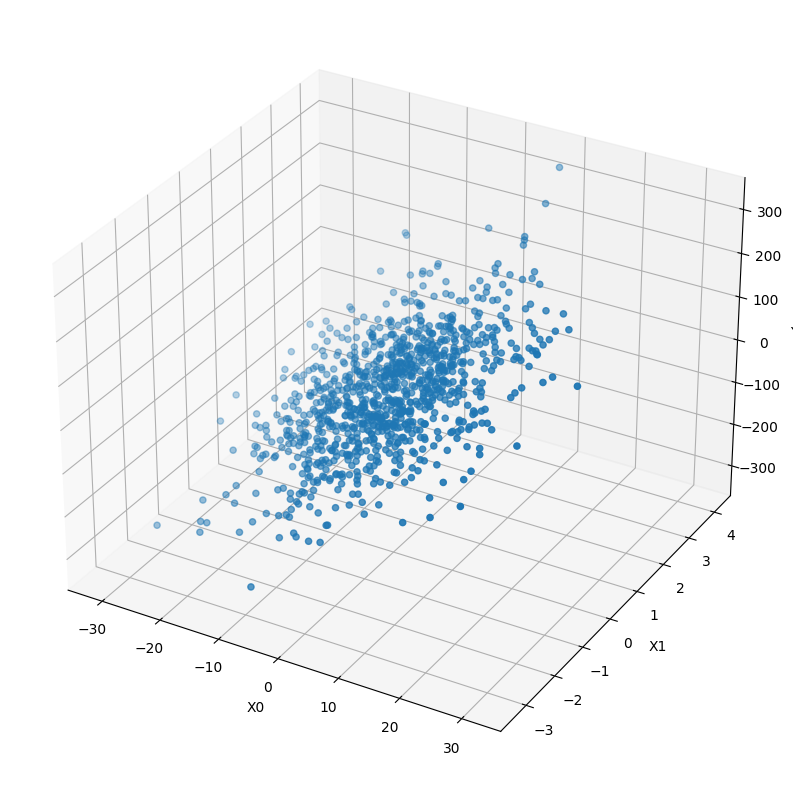

In [3]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

Отмасштабируем получившиеся признаки методом стандартизации.

In [5]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([-0.79012702,  0.02045785])

array([9.85635367, 0.99101454])

In [6]:
X.shape[0]

1000

In [7]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [8]:
X

array([[ 0.46447924, -0.64462559],
       [-0.58228272, -1.09738549],
       [-1.00118525, -0.3706113 ],
       ...,
       [ 1.29208317,  0.98990825],
       [ 0.20761816,  0.33516651],
       [ 0.02259069,  0.39523966]])

In [8]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([-2.40328590e-17,  9.54791801e-18])

array([1., 1.])

In [9]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Подготовка данных и средств проверки закончена. Далее реализуем сам стохастический градиентный спуск.

In [11]:
X[154]

array([-0.56362471,  2.30739038])

In [12]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

Iteration #0: W_new = [-0.8770491   1.16866253], MSE = 8143.11
Iteration #100: W_new = [57.29306457 59.90767571], MSE = 114.36
Iteration #200: W_new = [61.09511797 65.77858669], MSE = 42.21
Iteration #300: W_new = [61.22020165 66.88497513], MSE = 39.22
Iteration #400: W_new = [60.81127707 67.86690624], MSE = 39.01
Iteration #500: W_new = [63.01727104 68.87449656], MSE = 42.44
Iteration #600: W_new = [61.62004236 68.5922277 ], MSE = 39.45
Iteration #700: W_new = [61.34086506 68.62524345], MSE = 39.5
Iteration #800: W_new = [62.20610311 67.60795163], MSE = 39.17
Iteration #900: W_new = [62.40866111 67.70560306], MSE = 39.51
Iter 1000: error - 38.848560560356624, weights: [61.32996117 68.18159256]
В случае использования стохастического градиентного спуска ошибка составляет 38.8486
CPU times: total: 62.5 ms
Wall time: 119 ms


In [13]:
coef

array([62.6735955, 68.0472182])

Для стохастического градиентного спуска мы увеличили максимальное число итераций (max_iter) до 1000, что естественно, так как из-за специфики метода для достижения сходимости нужно большее количество шагов.

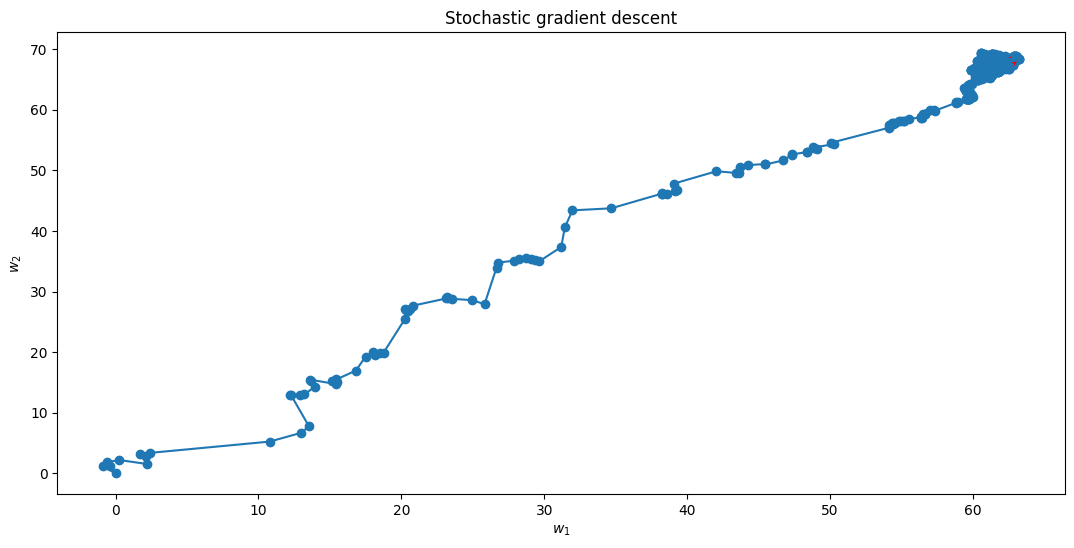

In [11]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

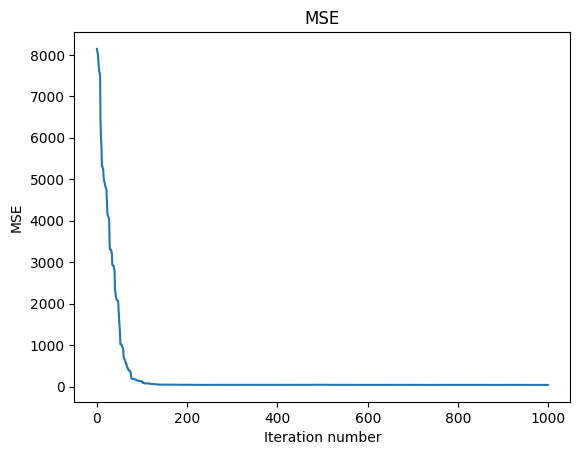

In [14]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Как и в случае градиентного спуска, вектор весов приближается к истинному. При этом падает и ошибка.

Добиться лучшей скорости сходимости в методе стохастического градиентного спуска можно варьируя величину шага или используя методы, подбирающие ее адаптивно.

Среди преимуществ SGD можно выделить гораздо более быстрое вычисление одного шага по сравнению с обычным градиентным спуском и отсутствие необходимости хранить всю выборку в памяти при работе метода, что в свою очередь позволяет работать с очень большими выборками, которые невозможно поместить в память.

## Переобучение <a class='anchor' id='overfit'>

Чтобы понять смысл переобучения и недообучения, начнем с примера. Допустим, у нас есть исходная известная зависимость 3-го порядка:

$$f(x) = 0.6 - 13.2x - 5.3 x^{2} - 4.17x^{3}.$$

Реализуем ее в виде python-функции и построим график.

In [15]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3

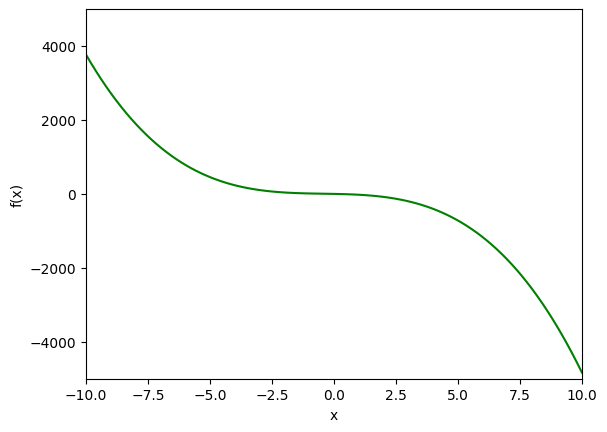

In [16]:
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g');

Теперь сгенерируем датасет из десяти случайных точек, подчиняющихся этой зависимости, с добавлением шума и нанесем на график.

In [25]:
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data]  + np.random.uniform(-1000, 1000, 10)

In [26]:
x_data

array([-5.53417842,  0.46326683,  1.01402913, -9.087961  , -2.78542329,
       -5.53838117,  3.77452324, -6.7253715 , -8.59350266,  8.8202172 ])

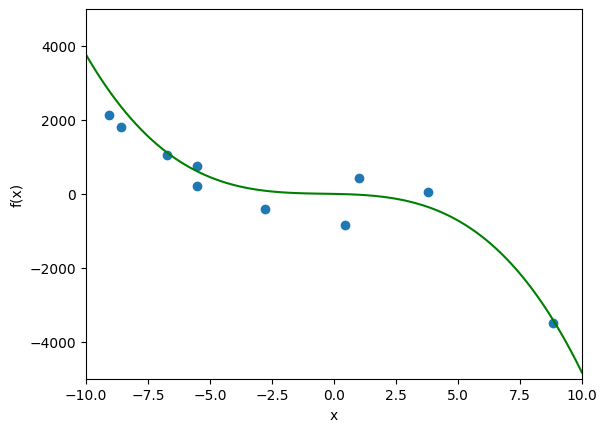

In [27]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data);

Теперь попробуем создать модель, способную восстановить исходную зависимость. Самым примитивным так называемый __константный алгоритм__, то есть модель вида 

$$a(x) = w_{0}.$$

Зависимость такой модели от признаков будет иметь вид горизонтальной прямой, что, очевидно, не обобщает нашу зависимость в должном виде (см. график ниже).

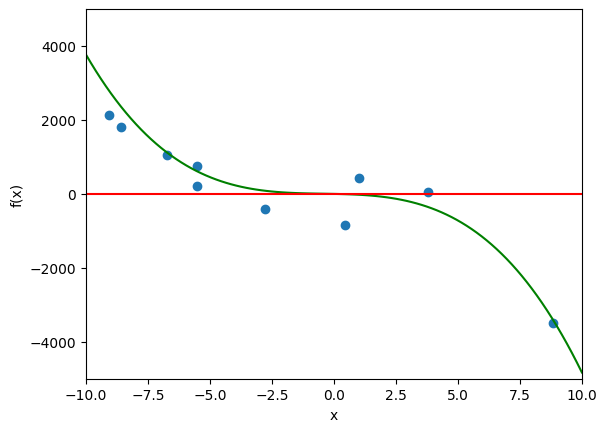

In [28]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, [dots.mean()]*len(dots), color='r');

Далее усложним семейство алгоритмов, применив линейную регрессию, которая в случае одного признака будет иметь вид 

$$a(x) = w_{0} + w_{1}x.$$

Обучим соответствующую модель, применив для этого методы python "из коробки" для работы с линейной регрессией.

In [1]:
from sklearn.linear_model import LinearRegression

# создадим модель
linear_regressor = LinearRegression()

# обучим ее
linear_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

ModuleNotFoundError: No module named 'sklearn'

In [30]:
# выведем полученный вес при признаке и свободный коэффициент
print(linear_regressor.coef_[0], linear_regressor.intercept_)

-237.82400777158773 -411.9249993231067


Нанесем полученную после обучения модель на график

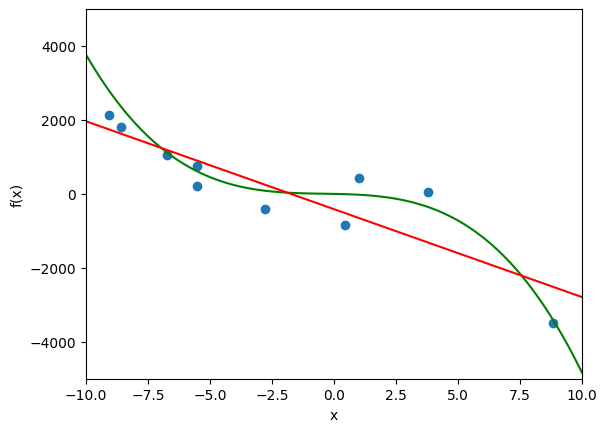

In [31]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, linear_regressor.predict(np.reshape(dots, (-1, 1))), color='r');

Мы обучили линейную модель, и видимо, что она, как и константная, плохо восстанавливает исходную зависимость. В данном случае можно говорить о __недообучении__. Хороший алгоритм не был построен, поскольку с помощью выбранного семейства алгоритмов невозможно восстановить исходную закономерность.

Усложним используемое семейство алгоритмов до кубической зависимости 

$$a(x) = w_{0} + w_{1}x + w_{2}x^{2} + w_{3}x^{3}.$$

Сделаем это путем искусственной генерации новой матрицы признаков, состоящей из исходных $x$, возведенных в степени до 3, используя `sklearn.preprocessing.PolynomialFeatures`. 

Из [статьи](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) про PolynomialFeatures:

For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd

In [36]:
a = pd.DataFrame([[2, 10, 4]], columns=['a', 'b', 'c'])

In [37]:
a

,a,b,c
0,2,10,4


In [38]:
PolynomialFeatures(degree=2).fit_transform(a)

array([[  1.,   2.,  10.,   4.,   4.,  20.,   8., 100.,  40.,  16.]])

In [40]:
x_data[0]

-5.5341784169292225

In [43]:
PolynomialFeatures(degree=3).fit_transform(x_data[0].reshape(-1, 1))

array([[   1.        ,   -5.53417842,   30.62713075, -169.49600597]])

In [44]:
x_data[0]**0, x_data[0]**1, x_data[0]**2, x_data[0]**3

(1.0, -5.5341784169292225, 30.627130750405236, -169.49600597136197)

In [46]:
# создадим новую кубическую модель
third_degree_regressor = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# обучим ее
third_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [47]:
# выведем полученные веса при признаках и свободный коэффициент
print(third_degree_regressor.named_steps.linearregression.coef_)
print(third_degree_regressor.named_steps.linearregression.intercept_)

[ 0.         21.09882775 -7.90436131 -4.26313079]
-55.95265093706246


Нанесем полученную в итоге зависимость на график.

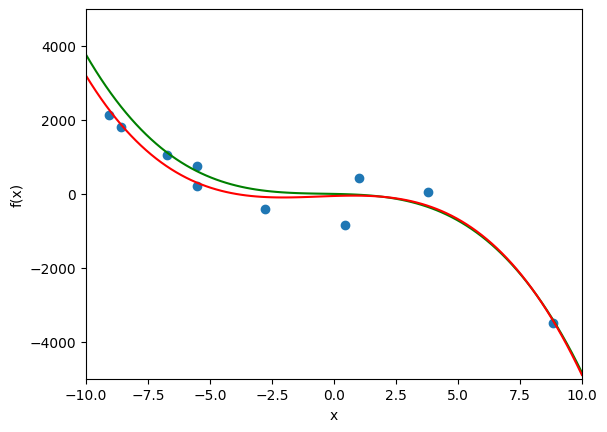

In [48]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, third_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r');

Полученный алгоритм достаточно хорошо описывает данные, но не идеально. И в реальных условиях может возникнуть вопрос, можно ли добиться лучшего совпадения увеличением сложности алгоритма.

Проиллюстрируем, что происходит в случае использования многочлена 8-й степени.

In [58]:
# создадим модель 8-й степени
eighth_degree_regressor = make_pipeline(PolynomialFeatures(degree=8), LinearRegression())

# обучим ее
eighth_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('linearregression', LinearRegression())])

Покажем получившийся график зависимости.

In [59]:
# выведем полученные веса при признаках и свободный коэффициент
print(eighth_degree_regressor.named_steps.linearregression.coef_)
print(eighth_degree_regressor.named_steps.linearregression.intercept_)

[ 0.00000000e+00  1.07116178e+03  8.76325216e+02  4.03130196e+01
 -5.61701732e+01 -9.81320836e+00  9.56286199e-02  1.16554743e-01
  6.21060019e-03]
-1536.7939079933421


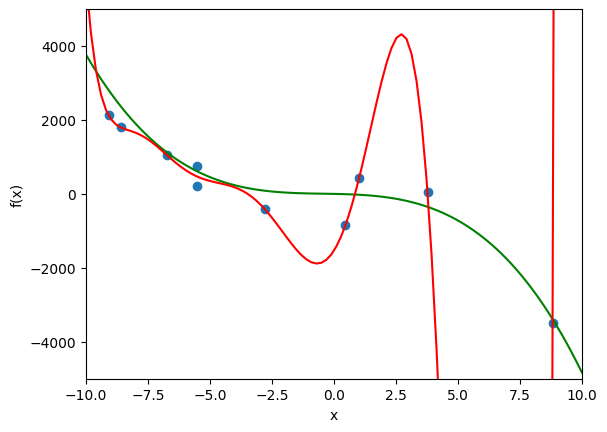

In [60]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, eighth_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r');

## Методы борьбы с переобучением <a class='anchor' id='methods'>

Видно, что новая модель лучше описывает имеющиеся в обучающей выборке данные и дает фактически идеальные ответы на них, но про этом в целом зависимость сильно отличается от истинной. Поэтому если мы попробуем применить эту модель на новых данных, ответы будут расходиться с правильными. Такое явление и называется __переобучением__. Алгоритм слишком сильно подогнан под обучающую выборку, и за счет этого будет давать неадекватные ответы на новых точках.

Одним из знаков, что произошло переобучение модели, или _мерой сложности_ является получение больших по модулю весов при признаках. Посмотрим, что получилось в нашей последней модели.

In [34]:
# выведем полученные веса при признаках и свободный коэффициент
print(eighth_degree_regressor.named_steps.linearregression.coef_)
print(eighth_degree_regressor.named_steps.linearregression.intercept_)

[ 0.00000000e+00  1.07116179e+03  8.76325216e+02  4.03130194e+01
 -5.61701733e+01 -9.81320835e+00  9.56286213e-02  1.16554743e-01
  6.21060018e-03]
-1536.7939099427895


Видим веса 2 и 3 порядков в то время как в кубичесой модели и в исходной зависимости ничего подобного не было. Это и говорит нам о том, что в данном случае имеет место переобучение.

На этой особенности и основывается метод _регуляризации_ для борьбы с переобучением.

### Регуляризация <a class='anchor' id='reg'>

#### $L_2$-регуляризация (ridge, регуляризация Тихонова)

Метод регуляризации заключается в "штрафовании" модели за слишком большие веса путем добавления нового члена к ошибке:

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

добавленный член $\lambda ||w||^{2}$ - **квадратичный регуляризатор**, который представляет собой $L_{2}$-норму вектора весов, то есть сумму квадратов весов $\sum^{d}_{j=1}w_{j}^{2}$, коэффициент $\lambda$ при нем - коэффициент регуляризации. Чем больше его значение, тем меньшая сложность модели будет получаться в процессе такого обучения. Если _увеличивать_ его, в какой-то момент оптимальным для модели окажется зануление всех весов. В то же время при слишком _низких_ его значениях появляется вероятность чрезмерного усложнения модели и переобучения. Выбор оптимального значения этого коэфициента является отдельной задачей и заключается в многократном обучении модели с разными его значениями и сравнении их качества.

По сути, смысл регуляризации заключается, как и в обычном обучении, в минимизации функционала ошибки, только в данном случае добавляется условие непревышения нормой вектора весов некоторого значения $||w||^{2}\leq C$, то есть ограничение весов, что и будет залогом избежания переобучения.

$$\begin{cases} Q(w, X) \rightarrow min \\ ||w||^2 \leq C \end{cases}$$

$$C = \frac{1}{\lambda}$$

In [61]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

На графике ниже изображено изменение весов признаков при увеличении коэффициента регуляризации `alpha` от $10^{-3}$ до $100$ для модели `Ridge` (L2-регуляризация). Чем больше значение `alpha`, тем сильнее регуляризация и тем сильнее модель "штрафует" за большие значения весов, они убывают плавно и примерно одновременно друг с другом.


In [86]:
np.logspace(-3, 2, 50)

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

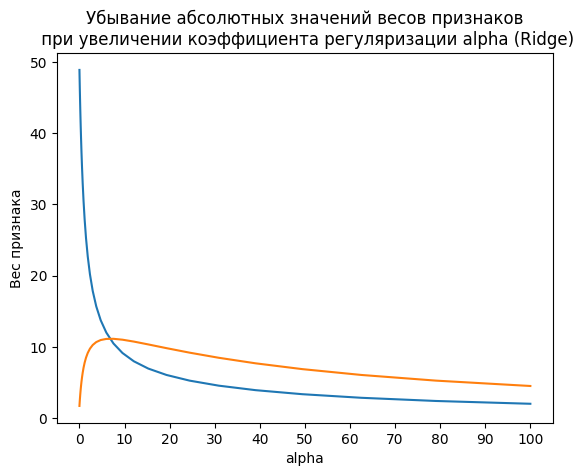

In [102]:
from sklearn.linear_model import Ridge

n = 50

train_amount = 5
train_X = X[:train_amount]
train_y = y[:train_amount]
test_X = X[train_amount:]
test_y = y[train_amount:]


coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

Коэффициент регуляризации: 0.35564803062231287
Веса: [39.29323873  4.54660362]
MSE на обучении: 45.56174288108137
MSE на тесте: 76.44455769106492


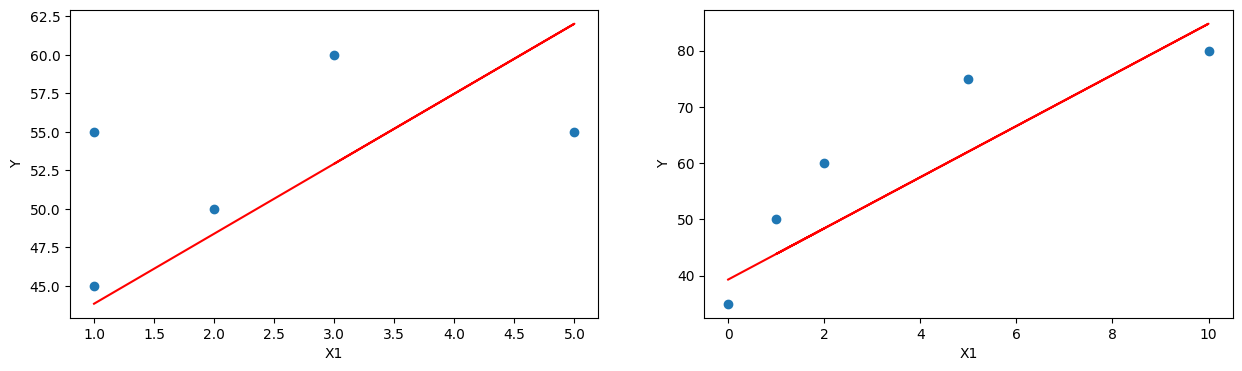

In [103]:
index = 25

coef = coeffs[index]

print(f'Коэффициент регуляризации: {alpha_list[index]}')
print(f'Веса: {coef}')

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axs

ax1.scatter(train_X[:, 1], train_y)

y_pred = np.dot(train_X, coef)
ax1.plot(train_X[:, 1], y_pred, c='r')

ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
print(f'MSE на обучении: {np.mean((y_pred - train_y)**2)}')

ax2.scatter(test_X[:, 1], test_y)

y_pred = np.dot(test_X, coef)
ax2.plot(test_X[:, 1], y_pred, c='r')

ax2.set_xlabel('X1')
ax2.set_ylabel('Y')
print(f'MSE на тесте: {np.mean((y_pred - test_y)**2)}')
plt.show()

In [ ]:
Коэффициент регуляризации: 0.35564803062231287
Веса: [39.29323873  4.54660362]
MSE на обучении: 45.56174288108137
MSE на тесте: 76.44455769106492

#### $L_1$-регуляризация (lasso, регуляризация через манхэттенское расстояние)

Описанный выше метод с использованием $L_{2}$-нормы вектора весов в качестве регуляризатора называется **$L_{2}$-регуляризацией**. По аналогии существует также **$L_{1}$-регуляризация**, использующая в качестве регуляризатора $L_{1}$-норму вектора весов, то есть сумму модулей весов.

$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

На графике ниже изображено изменение весов признаков при увеличении коэффициента регуляризации `alpha` от $10^{-3}$ до $100$ для модели `Lasso` (L1-регуляризация). Чем больше значение `alpha`, тем сильнее регуляризация и тем сильнее модель "штрафует" за большую абсолютную величину признаков. 

Такой метод часто используется для отбора признаков: у менее ценных признаков гораздо раньше обнуляются веса.

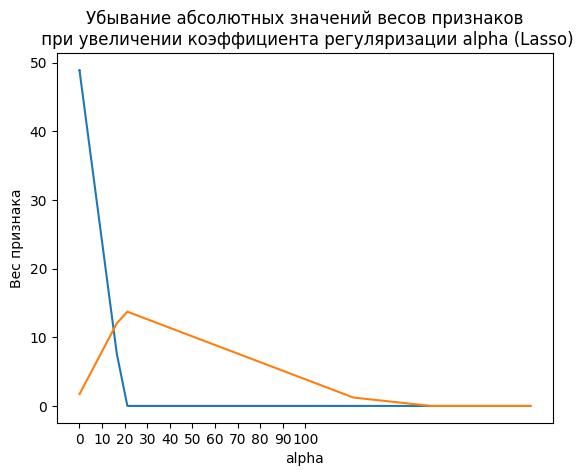

In [104]:
from sklearn.linear_model import Lasso

n = 50

coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2.3, n)

for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val, fit_intercept=False)
    lasso.fit(train_X, train_y)
    coeffs[i, :] = lasso.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

In [96]:
coeffs[index]

array([47.67317562,  2.00980735])

In [97]:
coeffs[index]

array([47.67317562,  2.00980735])

In [98]:
alpha_list[49]

199.52623149688787

Коэффициент регуляризации: 21.20950887920188
Веса: [ 0.         13.72381139]
MSE на обучении: 746.1054083621179
MSE на тесте: 1383.5074479731597


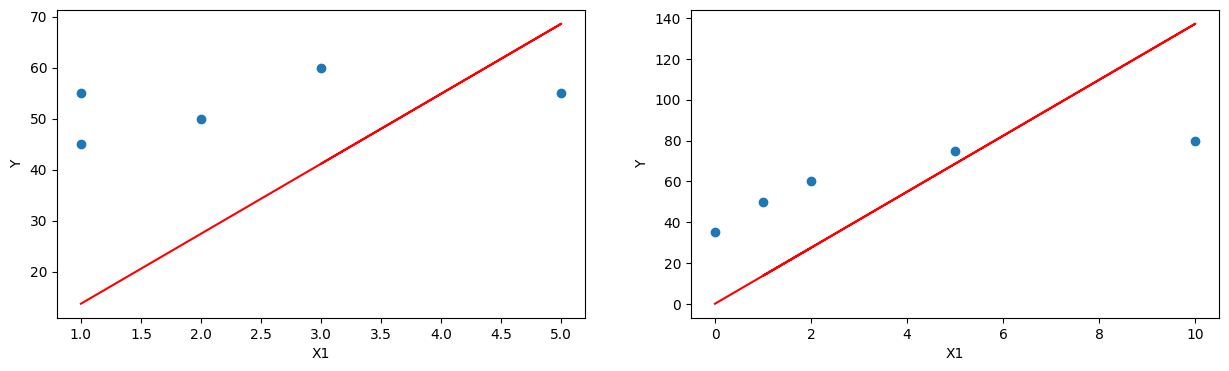

In [105]:
index = 40

coef = coeffs[index]

# coef = array([330.67198705,  500.5102286 ])

print(f'Коэффициент регуляризации: {alpha_list[index]}')
print(f'Веса: {coef}')

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axs

ax1.scatter(train_X[:, 1], train_y)

y_pred = np.dot(train_X, coef)
ax1.plot(train_X[:, 1], y_pred, c='r')

ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
print(f'MSE на обучении: {np.mean((y_pred - train_y)**2)}')

ax2.scatter(test_X[:, 1], test_y)

y_pred = np.dot(test_X, coef)
ax2.plot(test_X[:, 1], y_pred, c='r')

ax2.set_xlabel('X1')
ax2.set_ylabel('Y')
print(f'MSE на тесте: {np.mean((y_pred - test_y)**2)}')
plt.show()

#### Сравнение

$L_{2}$-регуляризатор:
* непрерывная гладкая функция
* штрафует модель за сложность

$L_{1}$-регуляризатор:
* негладкая функция
* занулении некоторых весов (отбор признаков)

Регуляризация создает некое абстрактное поле (зеленое) в градиентном спуске (овалы), из которого не может выйти обучение модели. Если мы увеличиваем Лямбду, то поле сужается.

<img src='compare_l1_l2_2.png'>

Можно применить одновременно L1 и L2 регуляризацию - это называется Elastic Net. Про это можно посмотреть [здесь](https://youtu.be/1dKRdX9bfIo) и почитать в оригинальной [статье](https://web.stanford.edu/~hastie/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf).

### Коэффициент детерминации

_Коэффициент детерминации_ $R^{2}$ является еще одной метрикой качества в задачах регрессии. Ранее мы говорили о средней абсолютной и среднеквадратичной ошибке. Коэффициент детерминации позволяет развить тему среднеквадратичной ошибки, интерпретируя ее. 

MSE не позволяет сама по себе сделать вывод о том, как хорошо модель решает задачу. Например, если целевая переманная принимает значения от 0 до 1, а MSE равняется 10, это плохой показатель, а когда целевая переменная варьируется от 1000 до 10000, такое же значение уже является очень хорошим. Для избавления от такой неясности и был введен коэффициент детерминации, который по сути является нормированной среднеквадратичной ошибкой и принимает значения от 0 до 1.

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{l}_{i=1}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{l}_{i=1}{(y - \bar{y})^2}}$$

где $\bar{y}=\frac{1}{l}\sum^{l}_{i=1}y_{i}$ - среднее значение целевой переменной.

Коэффициент детерминации характеризует, какую долю дисперсии ответов объясняет модель. Если $R^{2}=1$, то модель идеально описывает данные, если же $R^{2}$ близко к нулю, то предсказания сопоставимы по качеству с константной моделью.

In [110]:
true = np.array([0.1, 0.2, 0.1, 0.6, 0.3, 0.9, 0.7])
pred = np.array([0.1, 0.3, 0.2, 0.7, 0.9, 0.5, 0.5])

np.mean((true - pred) ** 2)

0.0842857142857143

In [107]:
true = np.array([100, 20, 10, 60, 30, 90, 70])
pred = np.array([110, 30, 20, 70, 50, 50, 50])

np.mean((true - pred) ** 2)

400.0

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [117]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика

In [118]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [119]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [120]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [121]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [122]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [123]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [124]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

Стандартизация

3.0


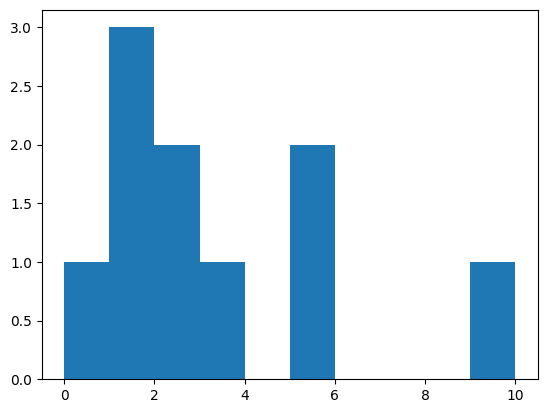

In [125]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


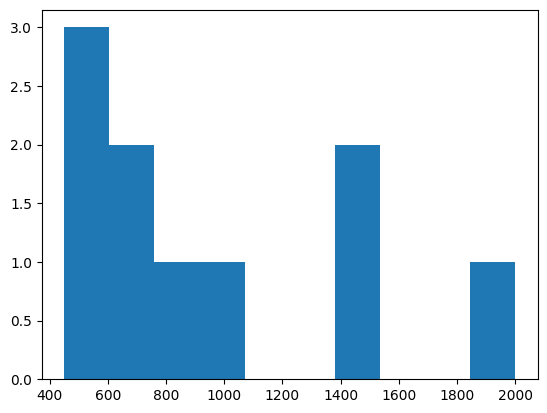

In [126]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [127]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [128]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

4.4408920985006264e-17
1.0


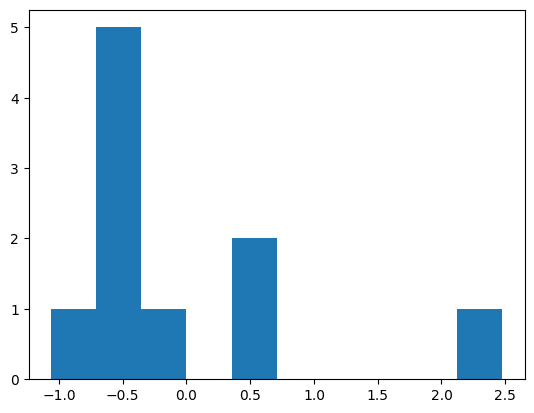

In [129]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17
0.9999999999999999


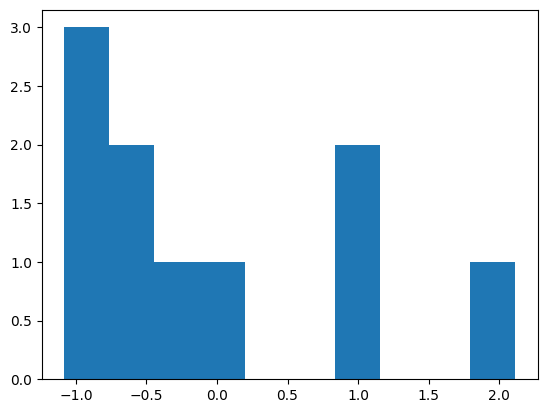

In [130]:
print(np.mean(X_st[:, 2]))
print(np.std(X_st[:, 2]))

plt.hist(X_st[:, 2])
plt.show()

In [132]:
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

SGD (Stochastic gradient descent)

In [133]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [134]:
W = np.random.randn(X.shape[1])
W

array([ 0.54314019, -0.47947522, -3.46789061, -0.97820978])

In [135]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [60]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [ 1.17363128  0.03608014  0.96973965 -0.62101697], error 3354.035258616858
Iter: 500, weights: [56.49773029  5.85973133  1.45377721  5.14255389], error 25.471476705427527
Iter: 1000, weights: [56.49999991  6.16610096  0.28806859  6.0428804 ], error 24.977753891779773
Iter: 1500, weights: [56.5         6.25494017 -0.12478495  6.38048271], error 24.914093298747133
Iter: 2000, weights: [56.5         6.28582026 -0.27304356  6.5026925 ], error 24.905846361271667
Iter: 2500, weights: [56.5         6.29687916 -0.32639037  6.54671632], error 24.90477790723277
Iter: 3000, weights: [56.5         6.30085685 -0.3455912   6.56256414], error 24.904639480547562
Iter: 3500, weights: [56.5         6.30228844 -0.35250233  6.56826852], error 24.904621546273184
Iter: 4000, weights: [56.5         6.30280372 -0.35498993  6.57032177], error 24.904619222745744
Iter: 4500, weights: [56.5         6.30298919 -0.35588532  6.57106082], error 24.904618921714366
Final MSE: 24.904618882713358


array([56.5       ,  6.30305587, -0.35620724,  6.57132652])

In [61]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        inds = np.random.randint(n, size=size)

        X_tmp = X[inds, ]
        y_tmp = np.array(y)[inds]


        y_pred_tmp = np.dot(X_tmp, W)
        dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
        W -= (eta * dQ)

        err = calc_mse(y, np.dot(X, W))

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [64]:
stohastic_gradient_descent(X_st, y, iterations=5000, size=4, eta=1e-2)

Iter: 0, weights: [ 1.35236369  0.18866936  1.7285269  -1.58371873], error 3196.3496062163586
Iter: 500, weights: [56.05990274  5.78481021  1.84064733  4.98785996], error 25.904408421450228
Iter: 1000, weights: [55.97927099  6.39823084  0.26150301  6.22490091], error 25.34944316224309
Iter: 1500, weights: [56.88535644  6.12342337 -0.06290775  6.08068291], error 25.200759637949826
Iter: 2000, weights: [56.94227943  6.04823984 -0.47554088  6.49456087], error 25.27762646991143
Iter: 2500, weights: [56.47335717  6.3428239  -0.31954269  6.76825701], error 24.973530543131123
Iter: 3000, weights: [56.22651808  6.29105794 -0.93898372  6.68097163], error 25.22634752151614
Iter: 3500, weights: [ 5.63587548e+01  6.36448490e+00 -5.35621620e-02  6.44404027e+00], error 24.98531061630373
Iter: 4000, weights: [57.07279134  5.99476396 -0.60620093  6.41558194], error 25.674271199017046
Iter: 4500, weights: [56.64413264  6.24109188 -0.14849073  6.44945121], error 24.93288608525247
Final MSE: 25.301486654

array([55.99273541,  6.30149031, -0.32417587,  6.91722642])

##### L1 регуляризация

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$
Про производную можно посмотреть [здесь](https://youtu.be/dHhYHGI9E6I).

##### L2 регуляризация

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda ||w||^{2} = 2\lambda w $$

In [136]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = 2* reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [143]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=0.001)

Iter: 0, weights: [12.292917    2.43002708  3.1363      0.37410387], error 3236.794184284311
Iter: 500, weights: [56.44355644  6.28820126 -0.31638236  6.5400563 ], error 24.90811774739125
Iter: 1000, weights: [56.44355644  6.28823489 -0.31654471  6.5401903 ], error 24.908115416060745
Iter: 1500, weights: [56.44355644  6.28823489 -0.31654471  6.54019031], error 24.908115415991027
Iter: 2000, weights: [56.44355644  6.28823489 -0.31654471  6.54019031], error 24.908115415991016
Iter: 2500, weights: [56.44355644  6.28823489 -0.31654471  6.54019031], error 24.908115415991016
Iter: 3000, weights: [56.44355644  6.28823489 -0.31654471  6.54019031], error 24.908115415991016
Iter: 3500, weights: [56.44355644  6.28823489 -0.31654471  6.54019031], error 24.908115415991016
Iter: 4000, weights: [56.44355644  6.28823489 -0.31654471  6.54019031], error 24.908115415991016
Iter: 4500, weights: [56.44355644  6.28823489 -0.31654471  6.54019031], error 24.908115415991016
Final MSE: 24.908115415991016


array([56.44355644,  6.28823489, -0.31654471,  6.54019031])

In [68]:
gradient_descent(X_st, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [12.05256742  3.08748111  1.66576977  2.20152717], error 3224.643593320706
Iter: 500, weights: [56.5         6.30306839 -0.35626768  6.57137641], error 24.90461887960129
Iter: 1000, weights: [56.5         6.30309349 -0.35638885  6.57147642], error 24.90461887690838
Iter: 1500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908383
Iter: 2000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 2500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 3000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 3500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 4000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 4500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Final MSE: 24.904618876908394


array([56.5       ,  6.30309349, -0.35638885,  6.57147643])

## Домашнее задание <a class='anchor' id='hw'>

1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

3. Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

## Литература

1. [Стохастический градиентный спуск](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)
2. [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
3. [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
4. [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
5. [Переобучение и Недообучение. Видео](https://youtu.be/m7P7bnLxIc4)
6. [Методы масштабирования данных. Видео](https://youtu.be/XsuCOfpf8Ic)

## Summary

_Масштабирование_
* Масштабирование признаков - хорошая практика, позволяющая обучать модели быстрее и делающая их более точными
* При использовании метрических алгоритмов масштабирование обязательно (!)

_Стохастический градиентный спуск_
* Стохастический градиентный спуск (SGD) - на каждом шаге уменьшаем ошибку только на одном объекте (или нескольких), а не на всей выборке, работает быстрее обычного GD, т.к. меньше вычислений
* SGD из-за стохастичности может "перепрыгнуть" локальный минимум и попасть в глобальный

_Регуляризация_
* Переобучение - модель "выучила" выборку, но обобщающая способность слабая
* Признаки переобучения: качество на трейне высокое, а на тесте низкое, большие веса модели
* Один из способов борьбы с переобучением - регуляризация - штраф за большие веса

### Определения
*Масштабирование данных*

**Нормализация данных** — метод предобработки числовых признаков в обучающих наборах данных с целью приведения их к некоторой общей шкале без потери информации о различии диапазонов. (шкала от 0 до 1)

**Стандартизация** — метод предобработки с целью приведения данных к единому формату и представлению. (М=0, std=1)
___________
_Стохастический градиентный спуск_

**Стохастический градиентный спуск** — метод нахождения локального экстремума функции (минимума или максимума) с помощью движения вдоль градиента, который считается на каждом шаге не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента.

___________
_Переобучение_

**Переобучение** (overfitting) — явление, когда алгоритм хорошо объясняет примеры из обучающей выборки (обеспечивает малую величину ошибки), но плохо работает на примерах, не участвовавших в обучении (не обеспечивает малую величину ошибки).

**Недообучение** (underfitting) — явление, при котором алгоритм обучения не обеспечивает достаточно малой величины средней ошибки на обучающей выборке.

**Кросс-валидация** — процедура оценивания обобщающей способности алгоритмов. С её помощью эмулируется наличие тестовой выборки, которая не участвует в обучении, но для которой известны правильные ответы.

________
_Регуляризация_

**Регуляризация** — метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. Эта информация часто имеет вид штрафа за сложность модели.
$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

**L1-регуляризация** (lasso, регуляризация через манхэттенское расстояние) — метод добавления дополнительных ограничений в виде $L_{1}$-норму вектора весов, то есть сумму модулей весов. 
$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

**L2-регуляризация** (ridge, регуляризация Тихонова) — метод добавления дополнительных ограничений в виде $L_{2}$-норму вектора весов, то есть сумму квадратов весов. 
$$||w||_{2} = \sum^{d}_{j=1}w^{2}.$$

